In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [131]:
tesla = pd.read_csv('/home/donglong_4/Stock-Prediction-Models-master/dataset/TSLA.csv')
tesla = tesla[['Date','Open','High','Low','Close']]
print(tesla.shape)
tesla.head()

(251, 5)


,Date,Open,High,Low,Close
0,2018-03-23,311.250000,311.250000,300.450012,301.540009
1,2018-03-26,307.339996,307.589996,291.359985,304.179993
2,2018-03-27,304.000000,304.269989,277.179993,279.179993
3,2018-03-28,264.579987,268.679993,252.100006,257.779999
4,2018-03-29,256.489990,270.959991,248.210007,266.130005


In [132]:
# tesla_2011 = pd.read_csv('TSLA-2011.csv')
# tesla_2011 = tesla_2011[['Date','Open','High','Low','Close']]
# print(tesla_2011.shape)
# tesla_2011.head()

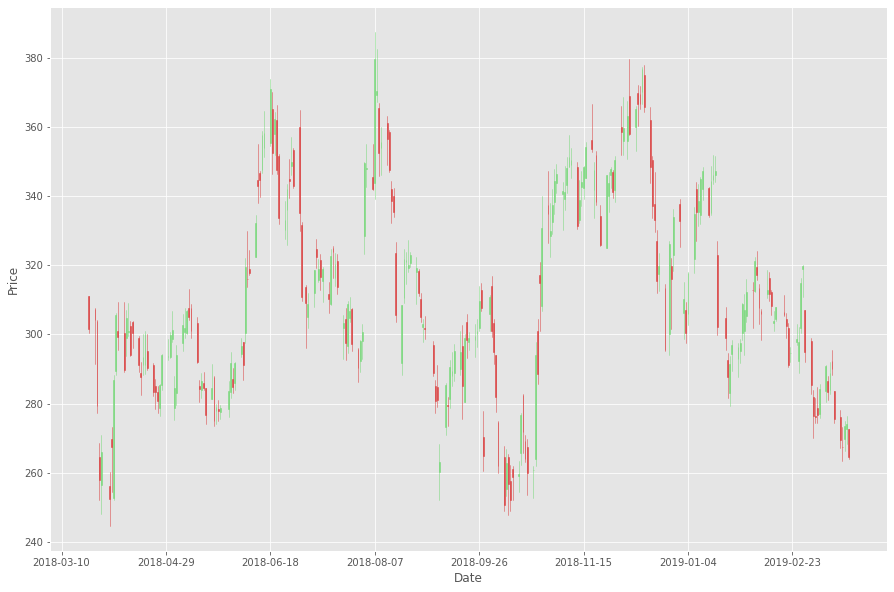

In [133]:
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc
from datetime import date
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

df_cp = tesla.copy()
df_cp.Date = date2num(pd.to_datetime(tesla.Date).dt.to_pydatetime())
ax1 = plt.subplot2grid((1,1), (0,0))
candlestick_ohlc(ax1,df_cp.values, width=0.4, colorup='#77d879', colordown='#db3f3f',alpha=2)
x_range = np.arange(df_cp.shape[0])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

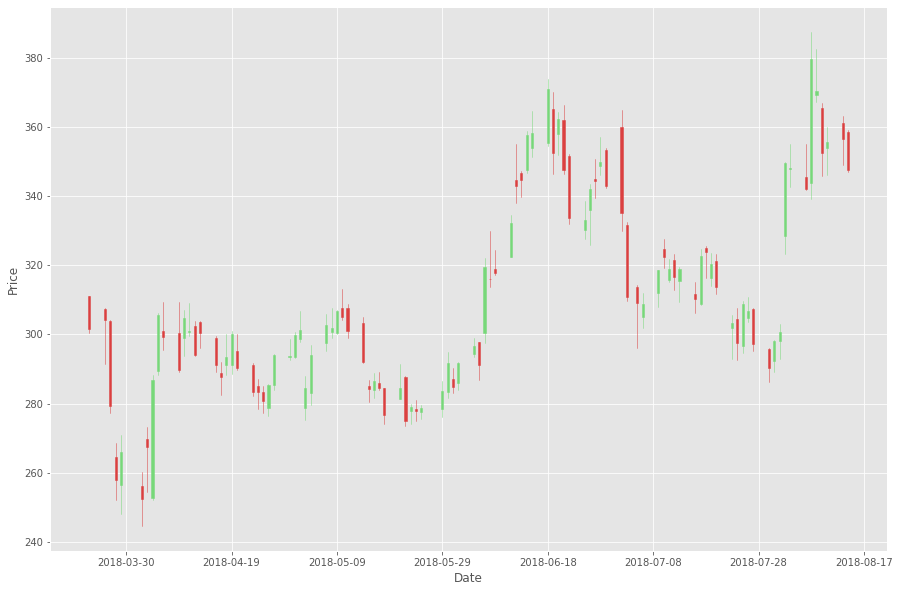

In [134]:
ax1 = plt.subplot2grid((1,1), (0,0))
ret=candlestick_ohlc(ax1,df_cp.iloc[:100,:].values, width=0.4, colorup='#77d879', colordown='#db3f3f',alpha=2)
x_range = np.arange(df_cp.shape[0])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

<AxesSubplot:>

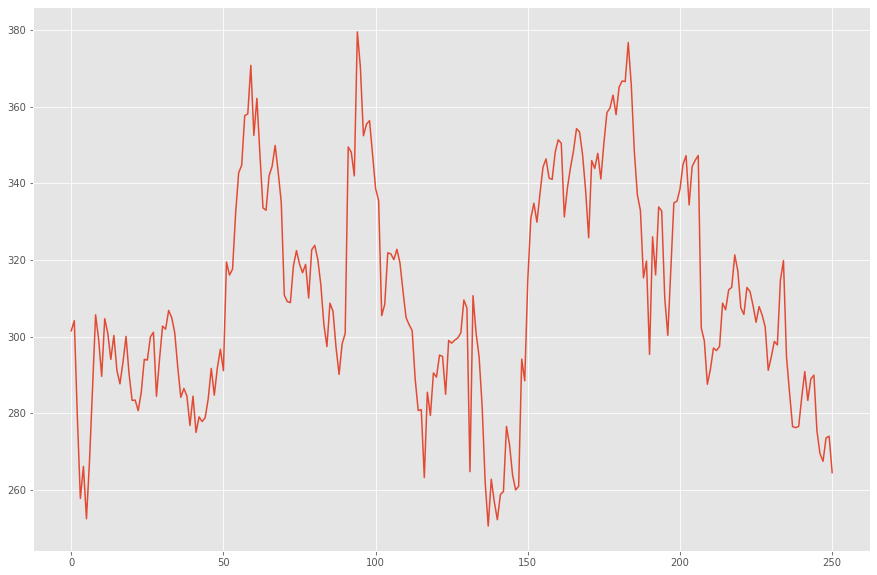

In [135]:
tesla.Close.plot()

In [136]:
# tesla_2011.Close.plot()

<AxesSubplot:>

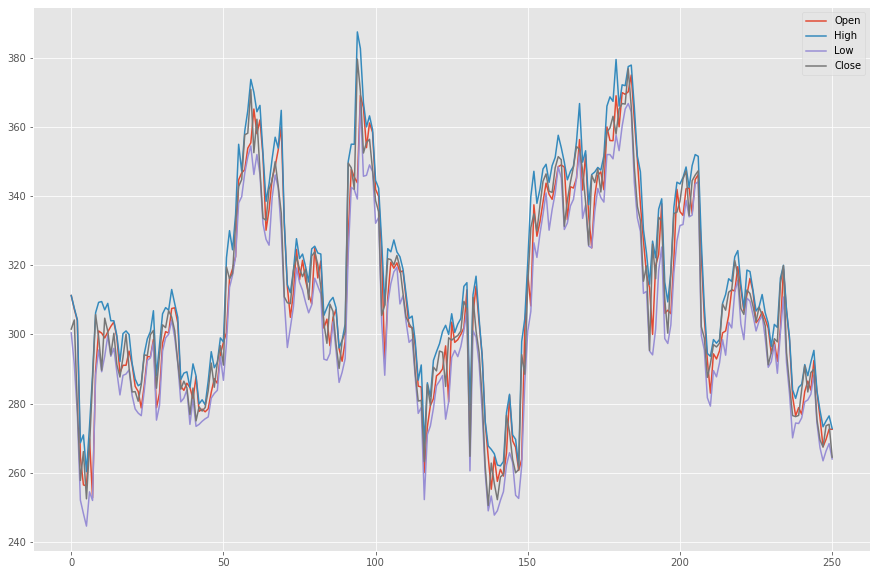

In [137]:
tesla.plot(kind = "line", y = ['Open', 'High', 'Low','Close'])

In [138]:
# tesla_2011.plot(kind = "line", y = ['Open', 'High', 'Low','Close'])

In [139]:
# tesla_2011['months'] = pd.DatetimeIndex(tesla_2011['Date']).month
# tesla_2011['year'] = pd.DatetimeIndex(tesla_2011['Date']).year
# tesla_2011.head()

In [140]:
# teslaPivot = pd.pivot_table(tesla_2011, values = "Close", columns = "year", index = "months")

In [141]:
# teslaPivot.head()

In [142]:
# teslaPivot.plot()

In [143]:
# teslaPivot.plot(subplots = True, figsize=(15, 15), layout=(4,4), sharey=True)

<AxesSubplot:ylabel='Frequency'>

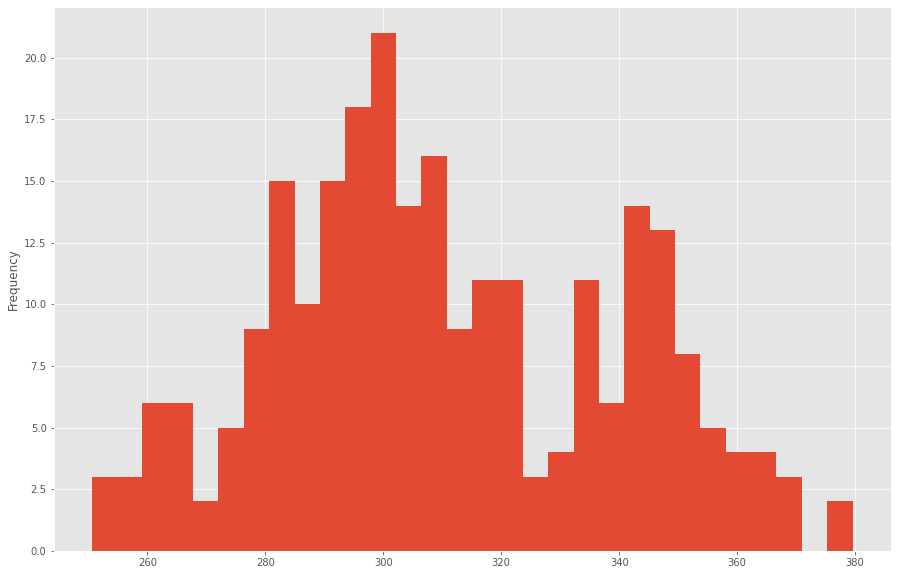

In [144]:
tesla.Close.plot(kind = "hist", bins = 30)

In [145]:
tesla['Closelog'] = np.log(tesla.Close)
tesla.head()

,Date,Open,High,Low,Close,Closelog
0,2018-03-23,311.250000,311.250000,300.450012,301.540009,5.708903
1,2018-03-26,307.339996,307.589996,291.359985,304.179993,5.717620
2,2018-03-27,304.000000,304.269989,277.179993,279.179993,5.631857
3,2018-03-28,264.579987,268.679993,252.100006,257.779999,5.552107
4,2018-03-29,256.489990,270.959991,248.210007,266.130005,5.583985


<AxesSubplot:ylabel='Frequency'>

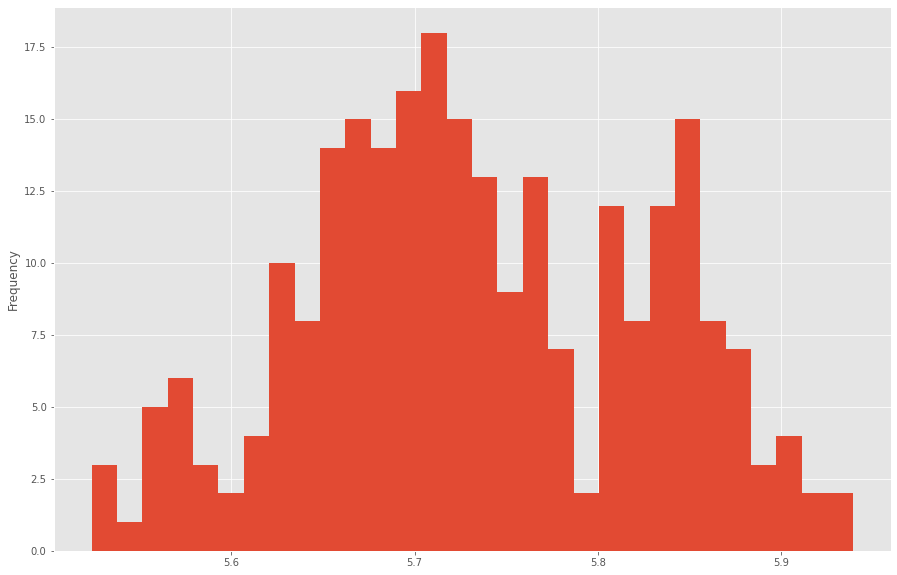

In [146]:
tesla.Closelog.plot(kind = "hist", bins = 30)

<AxesSubplot:>

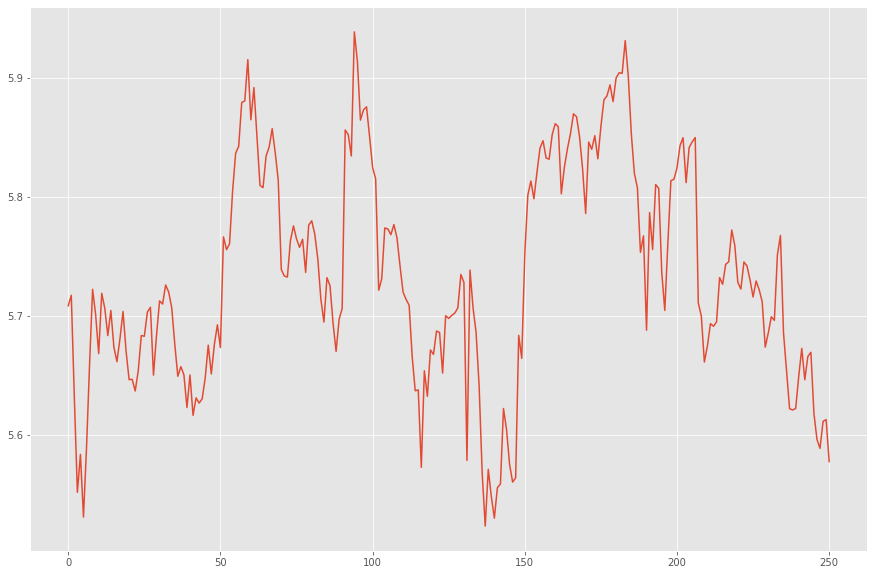

In [147]:
tesla.Closelog.plot()

<AxesSubplot:xlabel='Date'>

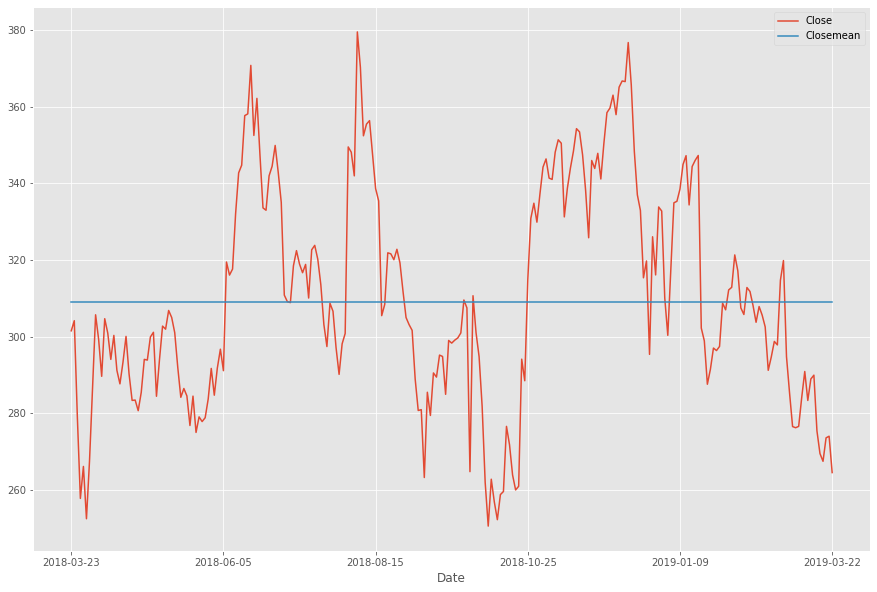

In [148]:
model_mean_pred = tesla.Closelog.mean()
# reverse log e
tesla["Closemean"] = np.exp(model_mean_pred)
tesla.plot(kind="line", x="Date", y = ["Close", "Closemean"])

In [149]:
from sklearn import linear_model
x = np.arange(tesla.shape[0]).reshape((-1,1))
y = tesla.Close.values.reshape((-1,1))
reg = linear_model.LinearRegression()
pred = reg.fit(x, y).predict(x)

<AxesSubplot:xlabel='Date'>

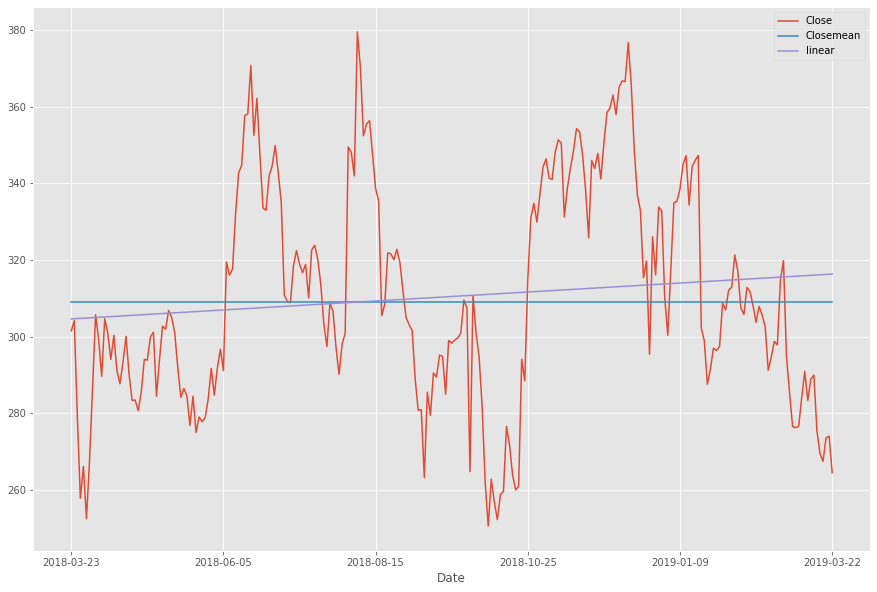

In [150]:
tesla['linear'] = pred
tesla.plot(kind="line", x="Date", y = ["Close", "Closemean", "linear"])

In [151]:
tesla.Date = pd.DatetimeIndex(tesla.Date)
# tesla.index = pd.PeriodIndex(tesla.Date, freq='D')
tesla.head()
tesla = tesla.sort_values(by = 'Date')
tesla.head()

,Date,Open,High,Low,Close,Closelog,Closemean,linear
0,2018-03-23,311.250000,311.250000,300.450012,301.540009,5.708903,309.18009,304.644032
1,2018-03-26,307.339996,307.589996,291.359985,304.179993,5.717620,309.18009,304.690849
2,2018-03-27,304.000000,304.269989,277.179993,279.179993,5.631857,309.18009,304.737667
3,2018-03-28,264.579987,268.679993,252.100006,257.779999,5.552107,309.18009,304.784484
4,2018-03-29,256.489990,270.959991,248.210007,266.130005,5.583985,309.18009,304.831302


In [152]:
tesla['timeIndex']= tesla.Date - tesla.Date.min()
tesla["timeIndex"] =tesla["timeIndex"] / np.timedelta64(1, 'D')
tesla.head()

,Date,Open,High,Low,Close,Closelog,Closemean,linear,timeIndex
0,2018-03-23,311.250000,311.250000,300.450012,301.540009,5.708903,309.18009,304.644032,0.0
1,2018-03-26,307.339996,307.589996,291.359985,304.179993,5.717620,309.18009,304.690849,3.0
2,2018-03-27,304.000000,304.269989,277.179993,279.179993,5.631857,309.18009,304.737667,4.0
3,2018-03-28,264.579987,268.679993,252.100006,257.779999,5.552107,309.18009,304.784484,5.0
4,2018-03-29,256.489990,270.959991,248.210007,266.130005,5.583985,309.18009,304.831302,6.0


In [153]:
tesla["timeIndex"] = tesla["timeIndex"].round(0).astype(int)
tesla.tail()

,Date,Open,High,Low,Close,Closelog,Closemean,linear,timeIndex
246,2019-03-18,276.000000,278.049988,267.299988,269.489990,5.596531,309.18009,316.161128,360
247,2019-03-19,267.500000,273.299988,263.459991,267.470001,5.589007,309.18009,316.207946,361
248,2019-03-20,269.690002,274.970001,266.299988,273.600006,5.611667,309.18009,316.254763,362
249,2019-03-21,272.600006,276.450012,268.450012,274.019989,5.613201,309.18009,316.301581,363
250,2019-03-22,272.579987,272.799988,264.000000,264.529999,5.577955,309.18009,316.348398,364


In [154]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

In [155]:
model_linear = smf.ols('Closelog ~ timeIndex', data = tesla).fit()
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Closelog   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.196
Date:                Mon, 06 Dec 2021   Prob (F-statistic):             0.0750
Time:                        17:54:31   Log-Likelihood:                 243.95
No. Observations:                 251   AIC:                            -483.9
Df Residuals:                     249   BIC:                            -476.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7160      0.012    493.722      0.000       5.693       5.739
timeIndex   9.844e-05   5.51e-05      1.788      0.075      -1e-05       0.000
==============================================================================
Omnibus:                        8.646   Durbin-Watson:                   0.171
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                4.362
Skew:                           0.011   Prob(JB):                        0.113
Kurtosis:                       2.355   Cond. No.                         420.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
model_linear.params

Intercept    5.716012
timeIndex    0.000098
dtype: float64

In [157]:
model_linear_pred = model_linear.predict()
model_linear_pred.shape

(251,)

In [158]:
tesla['linear_stats'] = model_linear_pred
tesla.head()

,Date,Open,High,Low,Close,Closelog,Closemean,linear,timeIndex,linear_stats
0,2018-03-23,311.250000,311.250000,300.450012,301.540009,5.708903,309.18009,304.644032,0,5.716012
1,2018-03-26,307.339996,307.589996,291.359985,304.179993,5.717620,309.18009,304.690849,3,5.716308
2,2018-03-27,304.000000,304.269989,277.179993,279.179993,5.631857,309.18009,304.737667,4,5.716406
3,2018-03-28,264.579987,268.679993,252.100006,257.779999,5.552107,309.18009,304.784484,5,5.716505
4,2018-03-29,256.489990,270.959991,248.210007,266.130005,5.583985,309.18009,304.831302,6,5.716603


<AxesSubplot:xlabel='timeIndex'>

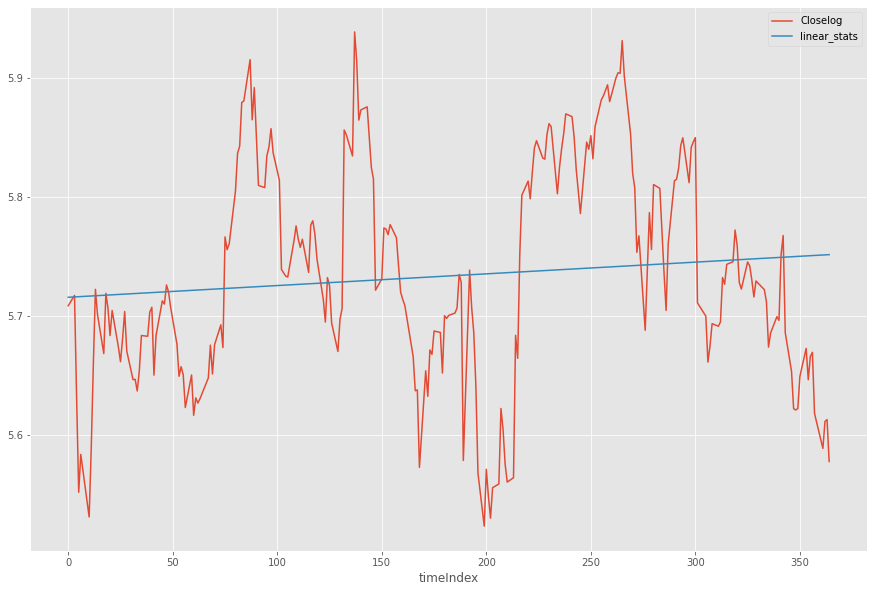

In [159]:
tesla.plot(kind="line", x="timeIndex", y = ["Closelog", 'linear_stats'])

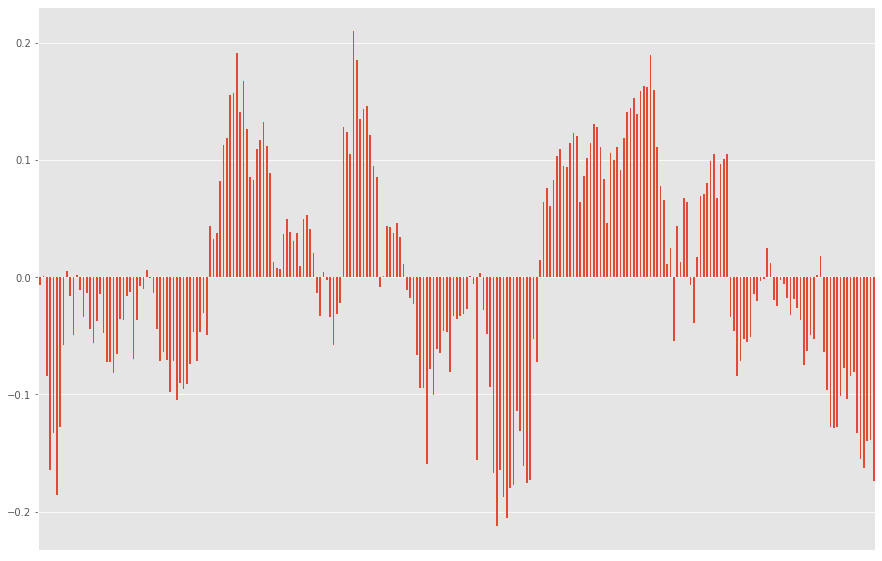

In [160]:
model_linear.resid.plot(kind = "bar").get_xaxis().set_visible(False)

In [161]:
model_linear_forecast_auto = model_linear.predict(exog = pd.DataFrame(dict(timeIndex=252), index=[0]))
model_linear_forecast_auto

0    5.740818
dtype: float64

In [162]:
tesla['pricelinear'] = np.exp(model_linear_pred)
tesla.head()

,Date,Open,High,Low,Close,Closelog,Closemean,linear,timeIndex,linear_stats,pricelinear
0,2018-03-23,311.250000,311.250000,300.450012,301.540009,5.708903,309.18009,304.644032,0,5.716012,303.691500
1,2018-03-26,307.339996,307.589996,291.359985,304.179993,5.717620,309.18009,304.690849,3,5.716308,303.781196
2,2018-03-27,304.000000,304.269989,277.179993,279.179993,5.631857,309.18009,304.737667,4,5.716406,303.811101
3,2018-03-28,264.579987,268.679993,252.100006,257.779999,5.552107,309.18009,304.784484,5,5.716505,303.841009
4,2018-03-29,256.489990,270.959991,248.210007,266.130005,5.583985,309.18009,304.831302,6,5.716603,303.870919


<AxesSubplot:xlabel='timeIndex'>

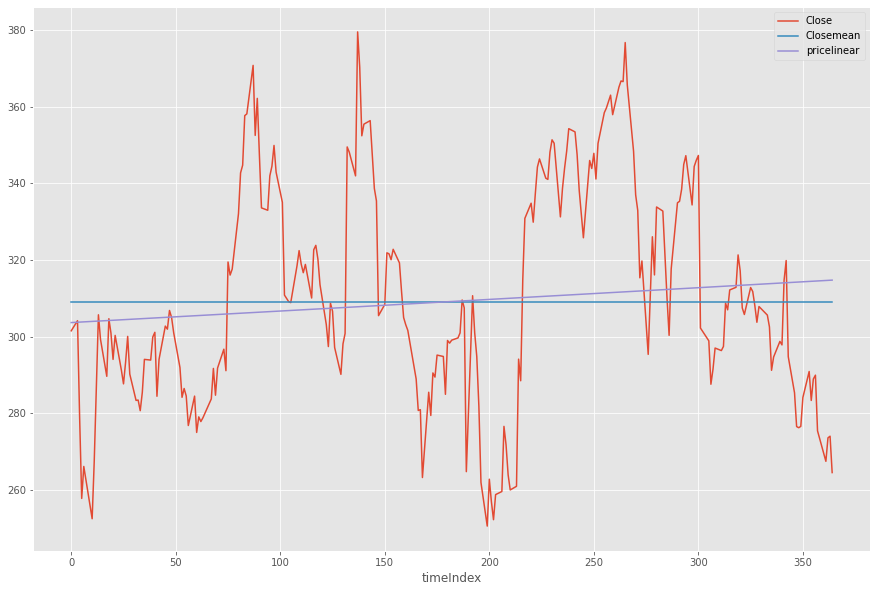

In [163]:
tesla.plot(kind="line", x="timeIndex", y = ["Close", "Closemean", "pricelinear"])

In [164]:
tesla["CloselogShift1"] = tesla.Closelog.shift()
tesla.head()

,Date,Open,High,Low,Close,Closelog,Closemean,linear,timeIndex,linear_stats,pricelinear,CloselogShift1
0,2018-03-23,311.250000,311.250000,300.450012,301.540009,5.708903,309.18009,304.644032,0,5.716012,303.691500,NaN
1,2018-03-26,307.339996,307.589996,291.359985,304.179993,5.717620,309.18009,304.690849,3,5.716308,303.781196,5.708903
2,2018-03-27,304.000000,304.269989,277.179993,279.179993,5.631857,309.18009,304.737667,4,5.716406,303.811101,5.717620
3,2018-03-28,264.579987,268.679993,252.100006,257.779999,5.552107,309.18009,304.784484,5,5.716505,303.841009,5.631857
4,2018-03-29,256.489990,270.959991,248.210007,266.130005,5.583985,309.18009,304.831302,6,5.716603,303.870919,5.552107


<AxesSubplot:xlabel='CloselogShift1', ylabel='Closelog'>

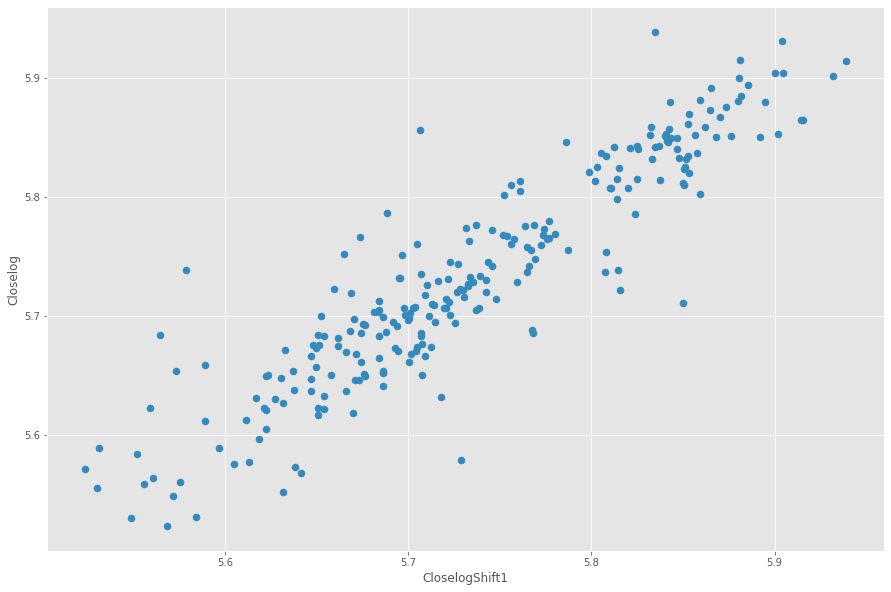

In [165]:
tesla.plot(kind= "scatter", y = "Closelog", x = "CloselogShift1", s = 50)

<AxesSubplot:>

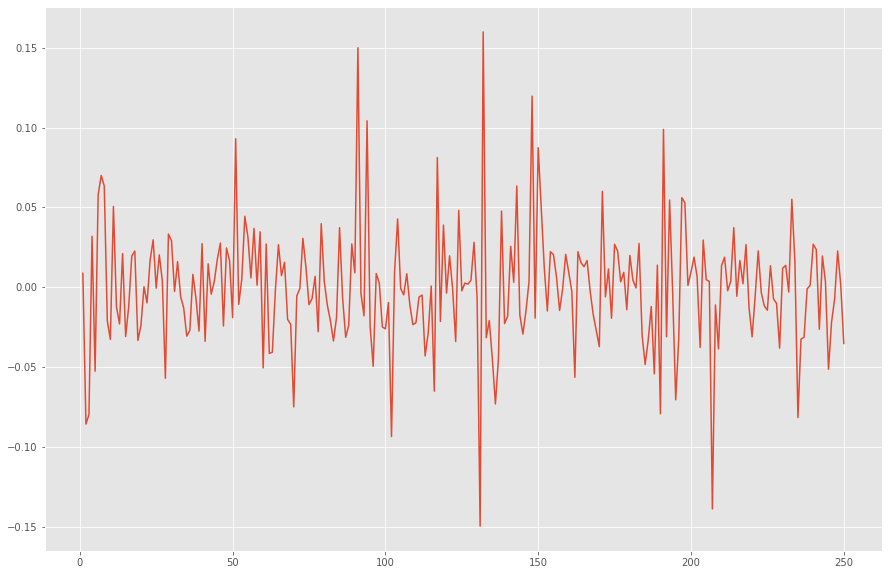

In [166]:
tesla["CloselogDiff"] = tesla.Closelog - tesla.CloselogShift1
tesla.CloselogDiff.plot()

In [167]:
tesla["CloseRandom"] = np.exp(tesla.CloselogShift1)
tesla.head()

,Date,Open,High,Low,Close,Closelog,Closemean,linear,timeIndex,linear_stats,pricelinear,CloselogShift1,CloselogDiff,CloseRandom
0,2018-03-23,311.250000,311.250000,300.450012,301.540009,5.708903,309.18009,304.644032,0,5.716012,303.691500,NaN,NaN,NaN
1,2018-03-26,307.339996,307.589996,291.359985,304.179993,5.717620,309.18009,304.690849,3,5.716308,303.781196,5.708903,0.008717,301.540009
2,2018-03-27,304.000000,304.269989,277.179993,279.179993,5.631857,309.18009,304.737667,4,5.716406,303.811101,5.717620,-0.085763,304.179993
3,2018-03-28,264.579987,268.679993,252.100006,257.779999,5.552107,309.18009,304.784484,5,5.716505,303.841009,5.631857,-0.079750,279.179993
4,2018-03-29,256.489990,270.959991,248.210007,266.130005,5.583985,309.18009,304.831302,6,5.716603,303.870919,5.552107,0.031878,257.779999


In [168]:
def adf(ts):
    rolmean = ts.rolling(window=12).mean()
    rolstd = ts.rolling(window=12).std()

    orig = plt.plot(ts.values, color='blue',label='Original')
    mean = plt.plot(rolmean.values, color='red', label='Rolling Mean')
    std = plt.plot(rolstd.values, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    adftest = adfuller(ts, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','# of Lags Used',
                                              'Number of Observations Used'])
    for key,value in adftest[4].items():
        adfoutput['Critical Value (%s)'%key] = value
    return adfoutput

<AxesSubplot:>

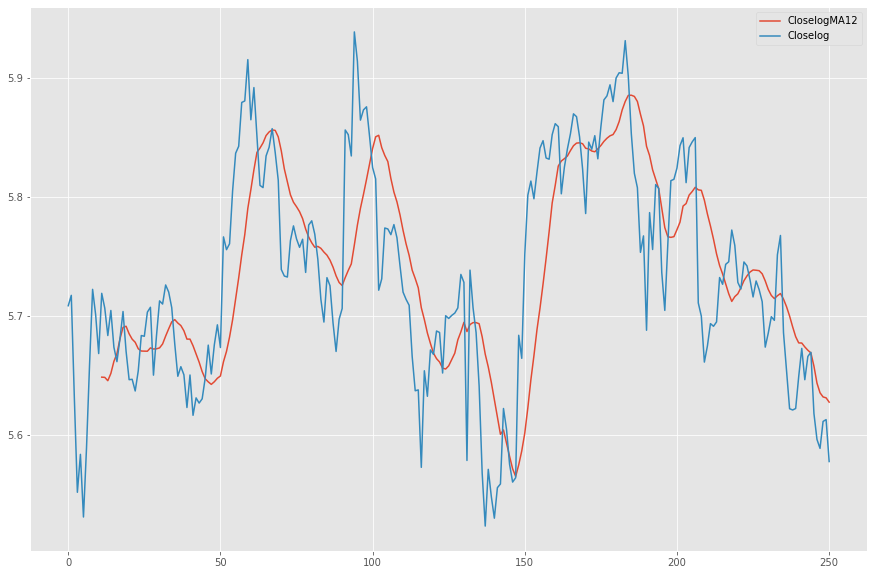

In [169]:
tesla['CloselogMA12'] = tesla.Closelog.rolling(window = 12).mean()
tesla.plot(kind ="line", y=["CloselogMA12", "Closelog"])

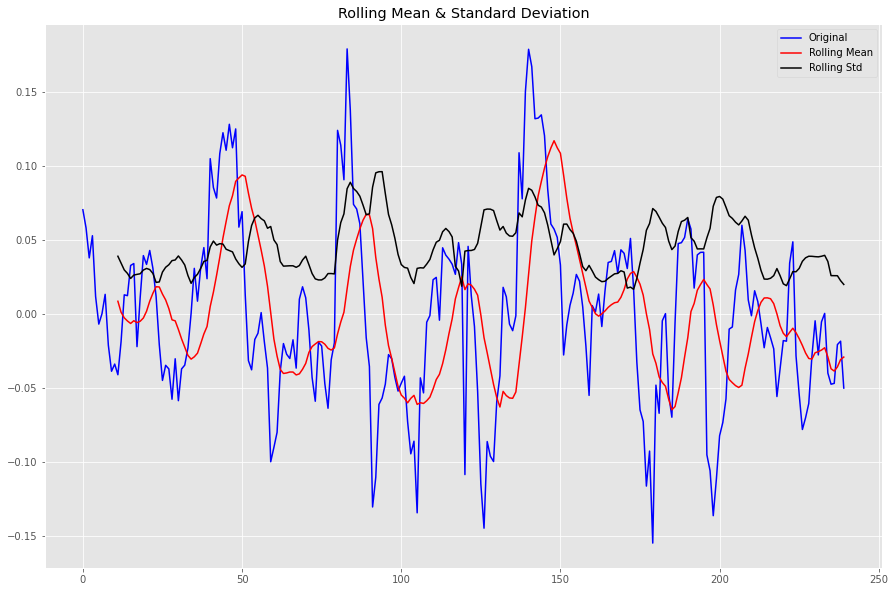

Test Statistic                  -4.719213
p-value                          0.000077
# of Lags Used                   0.000000
Number of Observations Used    239.000000
Critical Value (1%)             -3.458011
Critical Value (5%)             -2.873710
Critical Value (10%)            -2.573256
dtype: float64

In [170]:
ts = tesla.Closelog - tesla.CloselogMA12
ts.dropna(inplace = True)
adf(ts)

if test statistic < critical value (any), we can assume this data is stationary.

In [171]:
half_life = 12
tesla['CloselogExp12'] = pd.DataFrame.ewm(tesla.Closelog, halflife=half_life).mean()
1 - np.exp(np.log(0.5)/half_life)

0.05612568731830647

<AxesSubplot:>

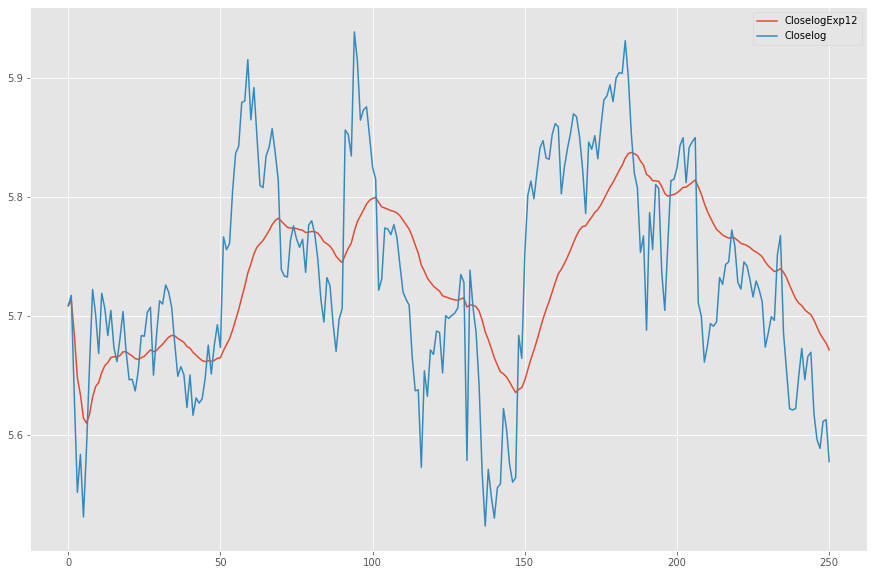

In [172]:
tesla.plot(kind ="line", y=["CloselogExp12", "Closelog"])

In [173]:
tesla["CloseExp12"] = np.exp(tesla.CloselogExp12)
tesla.tail()

,Date,Open,High,Low,Close,Closelog,Closemean,linear,timeIndex,linear_stats,pricelinear,CloselogShift1,CloselogDiff,CloseRandom,CloselogMA12,CloselogExp12,CloseExp12
246,2019-03-18,276.000000,278.049988,267.299988,269.489990,5.596531,309.18009,316.161128,360,5.751450,314.646428,5.618333,-0.021802,275.429993,5.643859,5.691138,296.230476
247,2019-03-19,267.500000,273.299988,263.459991,267.470001,5.589007,309.18009,316.207946,361,5.751548,314.677402,5.596531,-0.007524,269.489990,5.635754,5.685406,294.537299
248,2019-03-20,269.690002,274.970001,266.299988,273.600006,5.611667,309.18009,316.254763,362,5.751646,314.708380,5.589007,0.022660,267.470001,5.632247,5.681267,293.320839
249,2019-03-21,272.600006,276.450012,268.450012,274.019989,5.613201,309.18009,316.301581,363,5.751745,314.739360,5.611667,0.001534,273.600006,5.631484,5.677447,292.202417
250,2019-03-22,272.579987,272.799988,264.000000,264.529999,5.577955,309.18009,316.348398,364,5.751843,314.770343,5.613201,-0.035246,274.019989,5.627875,5.671863,290.575287


<AxesSubplot:xlabel='timeIndex'>

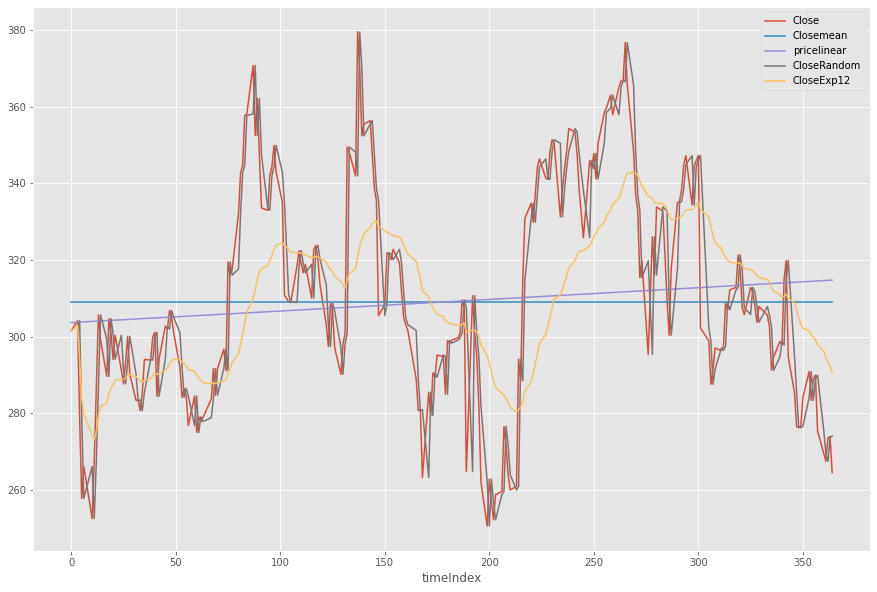

In [174]:
tesla.plot(kind="line", x="timeIndex", y = ["Close", "Closemean", "pricelinear", 
                                             "CloseRandom", "CloseExp12"])

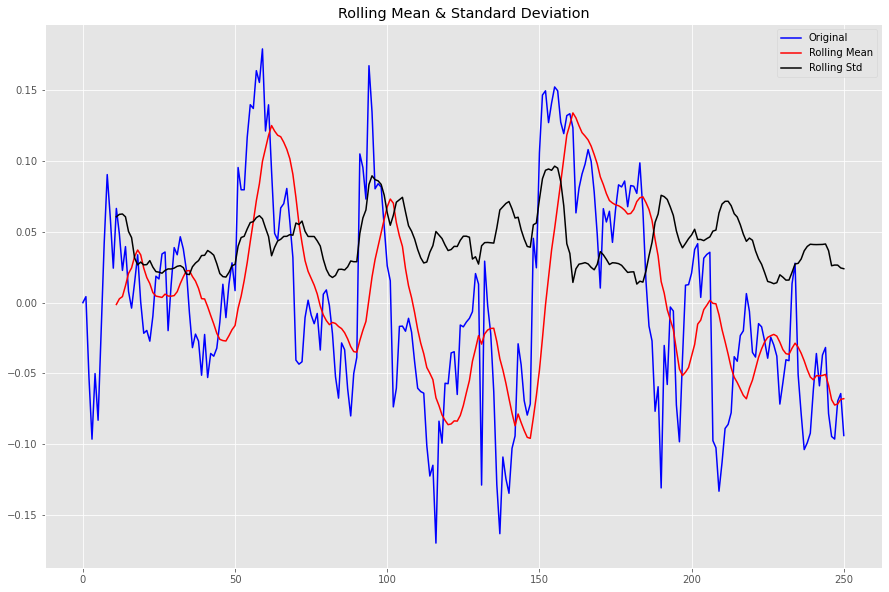

Test Statistic                  -3.976655
p-value                          0.001538
# of Lags Used                   0.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64

In [175]:
ts = tesla.Closelog - tesla.CloselogExp12
ts.dropna(inplace = True)
adf(ts)

In [176]:
from statsmodels.tsa.seasonal import seasonal_decompose
tesla.index = tesla.index.to_timestamp()

AttributeError: 'Int64Index' object has no attribute 'to_timestamp'

In [ ]:
decomposition = seasonal_decompose(tesla.Closelog,extrapolate_trend='freq',period=31)

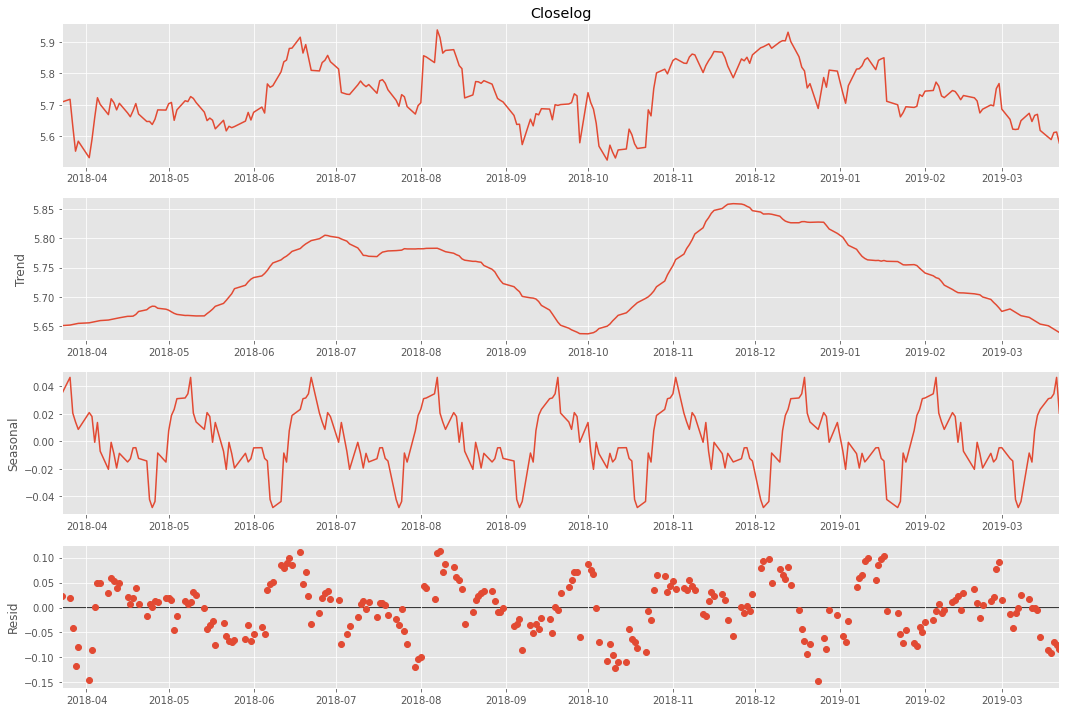

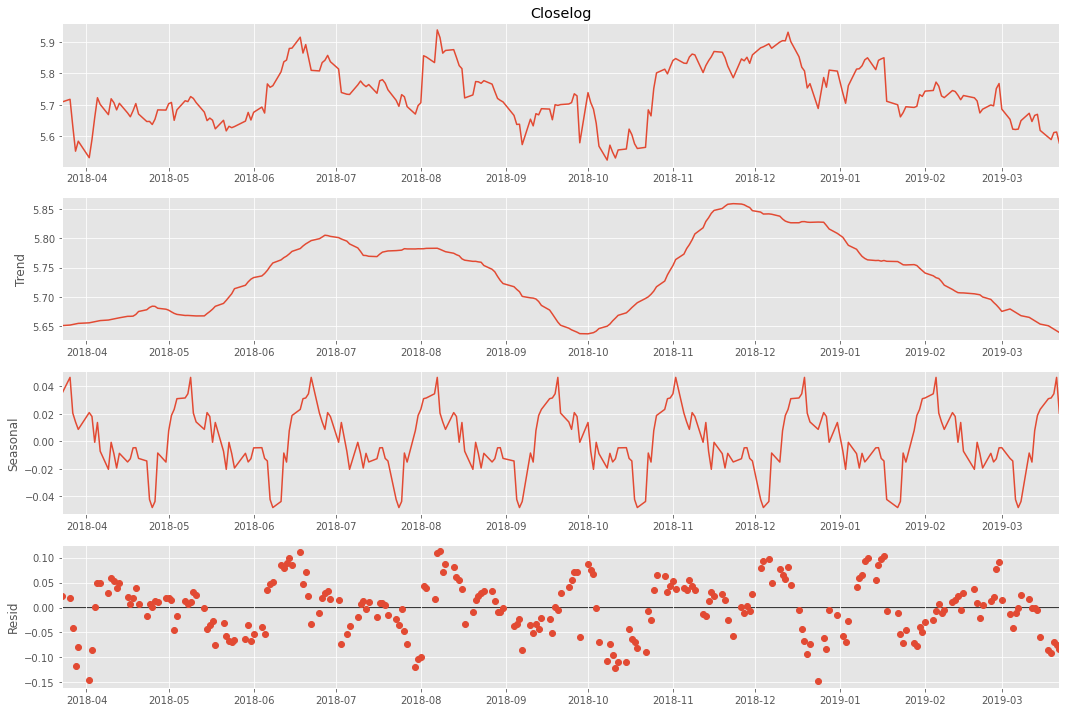

In [ ]:
decomposition.plot()

In [ ]:
ts = tesla.Closelog
ts_diff = tesla.CloselogDiff
ts_diff.dropna(inplace = True)

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)

In [ ]:
ACF = pd.Series(lag_acf)

<AxesSubplot:>

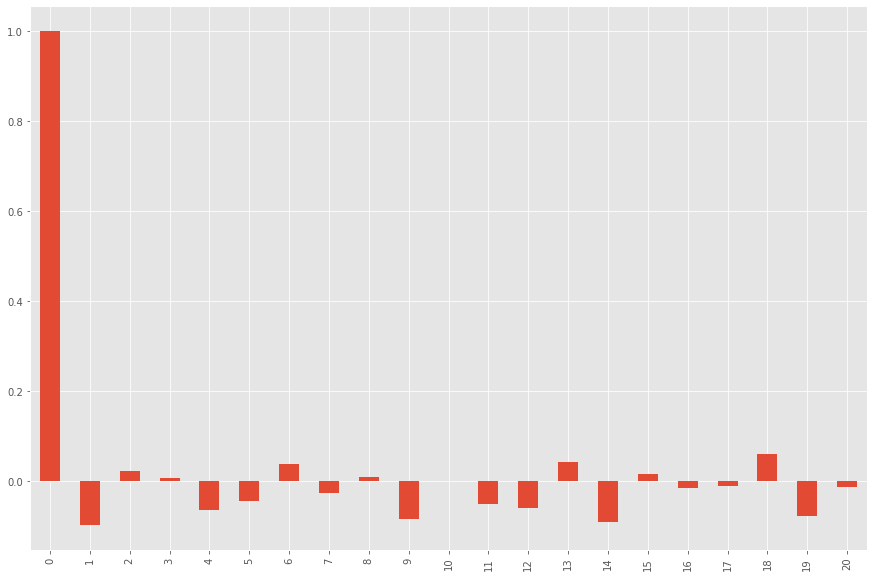

In [ ]:
ACF.plot(kind = "bar")